# Clase 9

## Pipeline Sklearn

In [10]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
df.shape

(569, 32)

In [12]:
df.iloc[:,1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [13]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [14]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [15]:
le.transform(['M', 'B'])

array([1, 0])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr =make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
#score = numero de bien etiqutados/numero total
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


## Cross Validation

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    
    pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist train.: %s, Class dist test.: %s, Acc: %.3f' %(k+1,np.bincount(y_train[train]),np.bincount(y_train[test]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

#e lo mismo de abajo

Fold:  1, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.935
Fold:  2, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.935
Fold:  3, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.957
Fold:  4, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.957
Fold:  5, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.935
Fold:  6, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.956
Fold:  7, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.978
Fold:  8, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.933
Fold:  9, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.956
Fold: 10, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
    np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


## Overfitting y Underfitting


## Curva de Aprendizaje

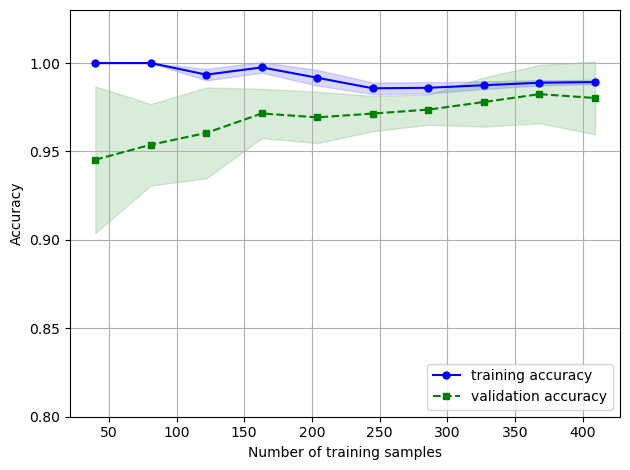

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1))
train_sizes, train_scores, test_scores =\
learning_curve(estimator=pipe_lr,
X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
color='blue', marker='o',
markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
train_mean + train_std,
train_mean - train_std,
alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')
plt.fill_between(train_sizes,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

## Curva de validación

c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

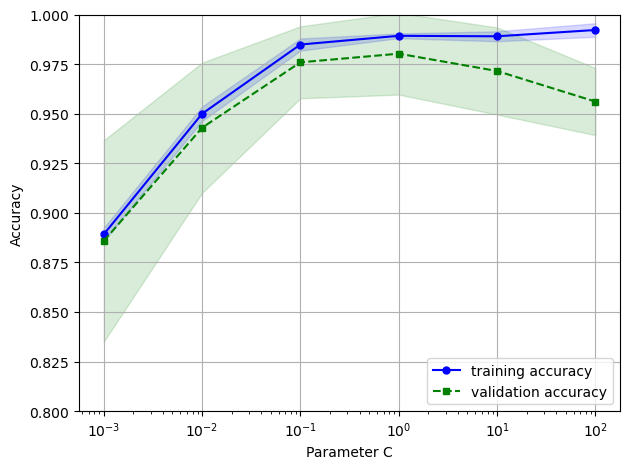

In [22]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
estimator=pipe_lr,X=X_train,
y=y_train,
param_name='logisticregression__C',
param_range=param_range,
cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
color='blue', marker='o',
markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
train_mean - train_std, alpha=0.15,
color='blue')

plt.plot(param_range, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')
plt.fill_between(param_range,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

## Ajuste de hiperparametros

### grid search

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))

param_range = [0.0001*0.5,0.0001,0.001*0.5,0.001,0.01*0.5,0.01,0.1*0.5,0.1,
               1.*0.5,1.,10.*0.5,10.,100.*0.5,100.,1000.*0.5,1000.]
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},
              {'svc__C': param_range,'svc__gamma': param_range,'svc__kernel':['rbf']}]
gs =GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9890821256038647
{'svc__C': 5.0, 'svc__gamma': 0.05, 'svc__kernel': 'rbf'}


In [27]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
'svc__kernel': ['linear']},
{'svc__C': param_range,
'svc__gamma': param_range,
'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
param_grid=param_grid,
scoring='accuracy',
cv=10,
n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)'''

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\npipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))\nparam_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]\nparam_grid = [{'svc__C': param_range,\n'svc__kernel': ['linear']},\n{'svc__C': param_range,\n'svc__gamma': param_range,\n'svc__kernel': ['rbf']}]\ngs = GridSearchCV(estimator=pipe_svc,\nparam_grid=param_grid,\nscoring='accuracy',\ncv=10,\nn_jobs=-1)\ngs = gs.fit(X_train, y_train)\nprint(gs.best_score_)\nprint(gs.best_params_)"

In [29]:
clf = gs.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.956


## Grid Search

Combinado K-fold CV con Grid Search

In [31]:
gs = GridSearchCV(estimator=pipe_svc,
param_grid=param_grid,
scoring='accuracy',
cv=10,
n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train,
scoring='accuracy', cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
np.std(scores)))

CV accuracy: 0.976 +/- 0.018


In [ ]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
scoring='accuracy',
cv=2)
scores = cross_val_score(gs, X_train, y_train,
scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
np.std(scores)))

CV accuracy: 0.934 +/- 0.016


## Metricas de rendimiento

Matriz de confusión

In [32]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


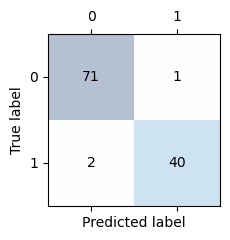

In [33]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score

print('Accuracy (ec. 2): %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision (ec. 5): %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall (ec. 6): %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1 (ec. 9): %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC (ec. 10): %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

'''print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))'''

Accuracy (ec. 2): 0.974
Precision (ec. 5): 0.976
Recall (ec. 6): 0.952
F1 (ec. 9): 0.964
MCC (ec. 10): 0.943


"print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))\nprint('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))\nprint('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))"

## Curva ROC

C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_27200\2340314822.py:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_27200\2340314822.py:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_27200\2340314822.py:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


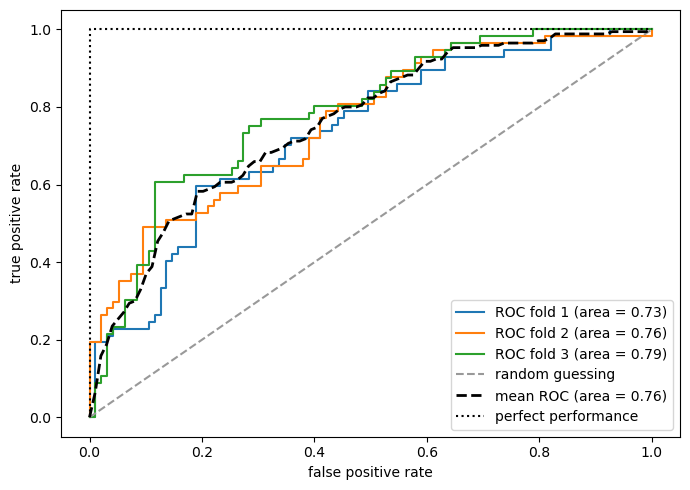

In [35]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
pipe_lr =make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(penalty='l2',random_state=0))
X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],probas[:, 1],pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
    tpr,
    label='ROC fold %d (area = %0.2f)'
    % (i+1, roc_auc))

plt.plot([0, 1],
[0, 1],
linestyle='--',
color=(0.6, 0.6, 0.6),
label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
[0, 1, 1],
linestyle=':',
color='black',
label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

## Datos Desbalanciados

In [36]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [38]:
print('Cantidad de datos en las clases: ', np.bincount(y_imb))

Cantidad de datos en las clases:  [357  40]


In [37]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [39]:
from sklearn.utils import resample
print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
y_imb[y_imb == 1],
replace=True,
n_samples=X_imb[y_imb == 0].shape[0],
random_state=123)
print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 40
Number of class 1 samples after: 357


In [40]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [41]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0